In [204]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [205]:
dateColumnNames = ['contact_date','Glycemie_der_date','HbA1c_der_date','der_date_poids','der_date_taille','first_contact_date']

In [206]:
dfView = pd.read_csv('PatientsHTA.zip',nrows=1)
df = pd.read_csv('PatientsHTA.zip',engine='c',parse_dates=dateColumnNames)

# Recherche de colonnes à enlever

In [207]:
# Nous gardons person_id afin de pouvoir s'en servir plus tard dans les groupby. Elle sera supprimée lors de l'apprentissagd u model car n'apporte aucunes informations. De plus nous supprimons aussi year of birth puisque cette information est déjà contenue dans age_now

df = df.drop(['contact_id','year_of_birth'],axis='columns')

# Nous enlevons les colonnes qui ont un trop grand nombre de valeurs Nan

In [208]:
df.isnull().sum()

person_id                              15
specialty_label                        15
contact_date                           15
cip                                    15
molecule_label                         17
short_name                             15
long_name                              15
Classe                                 15
dosage_1                               17
dose_1                                 17
dose_2                                 17
product_atc_code                       17
product_atc                            17
box                                   391
quantity                              228
frequency_label                       219
duration                             7066
Traitement_Autres_A10_dep_201701    41759
Traitement_Insulines_dep_201701     48188
Pulse                                  15
Tension Diastolique                    15
Tension Systolique                     15
Glycemie_prescription               49405
Glycemie_der_date                 

Nous voyons qu'il y a des colonnes avec un grands nombre de valeurs nan, nous supprimerons ces valeurs car elles seront innutiles pour l'apprentissage

In [209]:
columnsToDrop = df.columns[df.isnull().sum() >= 7000].to_list()
columnsToDrop

['duration',
 'Traitement_Autres_A10_dep_201701',
 'Traitement_Insulines_dep_201701',
 'Glycemie_prescription',
 'Glycemie_der_date',
 'Glycemie_der_mesure',
 'HbA1c_prescription',
 'HbA1c_der_date',
 'HbA1c_der_mesure',
 'Poids',
 'der_date_poids',
 'Taille',
 'der_date_taille']

In [210]:
df = df.drop(columnsToDrop,axis='columns')

## Recherche dans les noms de médicament

Tout d'abord nous vérifions si les colonnes ```short_name``` ```Classe``` ```product_atc_code``` ```product_atc``` et ```molecule_label``` sont identiques ou pas

In [211]:
dfGroupedByMoleculeLabel = df.groupby('product_atc_code')[['molecule_label','short_name','long_name','Classe','product_atc']].count()
dfGroupedByMoleculeLabel


molecule_label  short_name  long_name  Classe  product_atc
product_atc_code                                                            
C02AC01                        4           4          4       4            4
C02AC06                     5700        5700       5700    5700         5700
C02KX01                        3           3          3       3            3
C03BX03                     1101        1101       1101    1101         1101
C03CA01                     1426        1426       1426    1426         1426
C03DA01                      290         290        290     290          290
C03DA04                       33          33         33      33           33
C03EA04                      111         111        111     111          111
C03EB01                       14          14         14      14           14
C07AA05                        7           7          7       7            7
C07AB03                     8724        8724       8724    8724         8724
C07AB04                       59          59         59      59           59
C07AB07                     9487        9487       9487    9487         9487
C07AB12                      601         601        601     601          601
C07DB01                       10          10         10      10           10
C08CA01                     1018        1018       1018    1018         1018
C08CA06                        1           1          1       1            1
C08CA08                        3           3          3       3            3
C08DB01                      183         183        183     183          183
C09AA02                       99          99         99      99           99
C09AA03                       80          80         80      80           80
C09AA04                     2029        2029       2029    2029         2029
C09AA05                      359         359        359     359          359
C09AA06                       26          26         26      26           26
C09AA07                        1           1          1       1            1
C09AA09                        2           2          2       2            2
C09BA02                       17          17         17      17           17
C09BA04                     1249        1249       1249    1249         1249
C09CA01                      359         359        359     359          359
C09CA03                     3610        3610       3610    3610         3610
C09CA04                     1027        1027       1027    1027         1027
C09CA06                     1848        1848       1848    1848         1848
C09CA07                      192         192        192     192          192
C09DA01                      774         774        774     774          774
C09DA03                     2226        2226       2226    2226         2226
C09DA04                      926         926        926     926          926
C09DA06                        1           1          1       1            1
C09DB04                     6598        6598       6598    6598         6598
C09XA02                      131         131        131     131          131
C09XA52                      302         302        302     302          302

De toute évidence elles le sont, nous pouvons donc garder une seule des différentes colonnes précédantes, nous choisirons arbitrairement ```product_atc_code```.

In [212]:
dropColumnNames = dfGroupedByMoleculeLabel.columns.to_list()
dropColumnNames

['molecule_label', 'short_name', 'long_name', 'Classe', 'product_atc']

In [213]:
df = df.drop(dropColumnNames, axis='columns')

De plus, il y a beaucoup de valeur possible, donc pour mieux nous rendre compte de la répartition, nous affichons la répartition de chaque valeurs

In [214]:
valueCount = df.product_atc_code.value_counts()
valueCount

C07AB07     9487
C07AB03     8724
C09DB04     6598
C02AC06     5700
C09CA03     3610
C09DA03     2226
C09AA04     2029
C09CA06     1848
C03CA01     1426
C09BA04     1249
C03BX03     1101
C09CA04     1027
C08CA01     1018
C09DA04      926
C09DA01      774
C07AB12      601
C09CA01      359
C09AA05      359
C09XA52      302
C03DA01      290
C09CA07      192
C08DB01      183
C09XA02      131
C03EA04      111
C09AA02       99
C09AA03       80
C07AB04       59
C03DA04       33
C09AA06       26
C09BA02       17
C03EB01       14
C07DB01       10
C07AA05        7
C02AC01        4
C02KX01        3
C08CA08        3
C09AA09        2
C09AA07        1
C09DA06        1
C08CA06        1
Name: product_atc_code, dtype: int64

Nous enlevons toutes les lignes qui ont une valeur qui apparaît moins de 500 fois

(est ce qu'on veut vraiment faire ça et pas garder toutes les valeurs de la colonne ?)

In [215]:
goodValues = valueCount[valueCount.values >= 500].index.to_list()
print(df.shape[0])
df = df[df.product_atc_code.isin(goodValues)]
print(df.shape[0])

50648
48344


## Analyse du champ ```CIP```

In [216]:
dfGroupByCIP = df.groupby('cip')[['person_id']].count()
dfGroupByCIP

person_id
cip                    
3.400940e+12        634
3.400950e+12      45644
3.400960e+12       2066

Il y a plusieurs valeurs de CIP. Cependant les deux autres valeurs sont assez petites comparées à la plus grande. Nous choisissons de ne garder que les données ayant la valeur qui apparaît plus de 45 000 fois. Finalement si nous faisons ce choix toutes la colonne peut ête supprimée car ça ravient à n'avoir qu'une seule valeur dans toute la colonne ce qui a donc peut d'intérêt

**QUAND ON FAIT CA EST CE QUE L'ON DOIT SUPPRIMER LES MAUVAISES LIGNES AVANT DE SUPPRIMER LA COLONNE OU PAS ? (dans le doute on va dire que oui)**

In [217]:
print (df.shape[0])
goodValues = dfGroupByCIP[dfGroupByCIP.person_id.values >= 3000]
df = df[df.cip.isin(goodValues.index)]
print (df.shape[0])

df = df.drop('cip',axis='columns')

48344
45644


## Analyse du champ ```frequency_label```

In [218]:
dfGroupByFrequencyLabel = df.groupby('frequency_label')[['person_id']].count()
dfGroupByFrequencyLabel

person_id
frequency_label           
Jour                 45528
Mois                     1

Pour les mêmes raison que précédemment, nous pouvons supprimer la colonne frequency label car elle n'apporte aucune informations

**EST CE QU'IL FAUT SUPPRIMER LA LIGNE AVEC ```MOIS``` OU PAS ?**

In [219]:
df = df[df.frequency_label == 'Jour']
df = df.drop('frequency_label',axis='columns')

## Analyse du champ ```specialty_label```

In [220]:
dfMedecinSpecialityCount = df.groupby(df.specialty_label)[['person_id']].count()
dfMedecinSpecialityCount

person_id
specialty_label               
Cardiologues              1232
Endocrinologes             103
Médecin généraliste      44160
Non Renseigné               29
Pneumologues                 2
Rhumatologues                2

In [221]:
goodValues = dfMedecinSpecialityCount[dfMedecinSpecialityCount.values >= 2000].index.to_list()

print(df.shape[0])
df = df[df.specialty_label.isin(goodValues)]
print(df.shape[0])

df = df.drop('specialty_label',axis='columns')

45528
44160


Une fois toutes ses modifications faites, nous supprimons les dernières lignes contenant des valeurs nulles s'il en existe

In [222]:
df.isna().sum()

person_id                0
contact_date             0
dosage_1                 0
dose_1                   0
dose_2                   0
product_atc_code         0
box                    271
quantity                 9
Pulse                    0
Tension Diastolique      0
Tension Systolique       0
gender_code              0
Age_presc                0
Age_now                  0
first_contact_date       0
dtype: int64

In [223]:
print(df.shape[0])
df = df[~df.box.isna()]
df = df[~df.quantity.isna()]
print(df.shape[0])

44160
43886


## Ajout d'une série ```visit_time_interval``` contenant les données d'entraînement pour la prédiction de la prochaine date de visite

In [224]:
visitTimeInterval = df.contact_date - df.first_contact_date

df['visit_time_interval'] = visitTimeInterval
df.visit_time_interval = df.visit_time_interval.astype(int)

df = df.drop(['contact_date', 'first_contact_date'],axis='columns')

Enfin nous supprimons le champ ```person_id```

In [225]:
personId = df.person_id
df = df.drop('person_id',axis='columns')

## Matrice de corrélation

### Transformation en données numériques

Pour faire une matrice de corrélation les données doivent être numériques. Pour transformer les données non numérique en données numérique nous utilisons un label encoder

In [226]:
df.reset_index(inplace=True,drop=True)

In [227]:
df.dtypes

dosage_1               float64
dose_1                 float64
dose_2                 float64
product_atc_code        object
box                    float64
quantity               float64
Pulse                  float64
Tension Diastolique    float64
Tension Systolique     float64
gender_code             object
Age_presc              float64
Age_now                float64
visit_time_interval      int64
dtype: object

In [228]:
productAtcCodeLabelEncoder = LabelEncoder()
genderCodeLabelEncoder = LabelEncoder()

df.product_atc_code = productAtcCodeLabelEncoder.fit_transform(df.product_atc_code)
df.gender_code = genderCodeLabelEncoder.fit_transform(df.gender_code)

In [229]:
df.dtypes

dosage_1               float64
dose_1                 float64
dose_2                 float64
product_atc_code         int64
box                    float64
quantity               float64
Pulse                  float64
Tension Diastolique    float64
Tension Systolique     float64
gender_code              int64
Age_presc              float64
Age_now                float64
visit_time_interval      int64
dtype: object

### Affichage

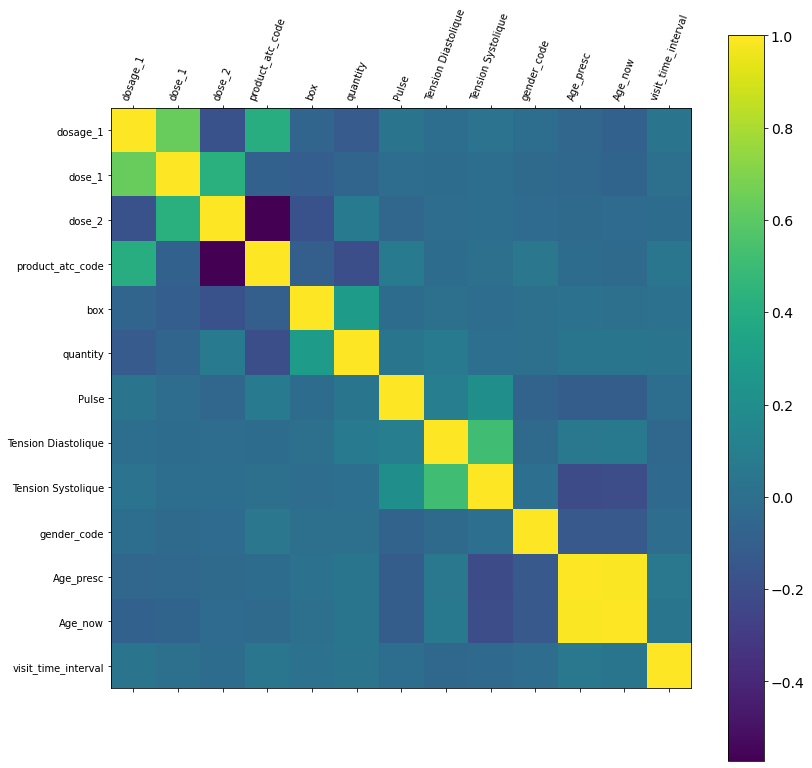

In [230]:
f = plt.figure(figsize=(13,13))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]),labels=df.columns,rotation=70)
plt.yticks(range(df.shape[1]),df.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

## Affichage de quelques graphiques intéressant

In [237]:
plt.scatter(df.Age_presc.values,df.Age_now.values,s=1)
plt.xlabel('age prescription')
plt.ylabel('age now')
plt.show()